In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean plotting style
sns.set_style("whitegrid")


In [2]:
# Loading Chicago Taxi dataset
df = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/chicago_taxi_train.csv"
)


In [3]:
# Number of rows and columns
df.shape


(31694, 18)

In [4]:
# Column names
df.columns


Index(['TRIP_START_TIMESTAMP', 'TRIP_END_TIMESTAMP', 'TRIP_START_HOUR',
       'TRIP_SECONDS', 'TRIP_MILES', 'TRIP_SPEED', 'PICKUP_CENSUS_TRACT',
       'DROPOFF_CENSUS_TRACT', 'PICKUP_COMMUNITY_AREA',
       'DROPOFF_COMMUNITY_AREA', 'FARE', 'TIPS', 'TIP_RATE', 'TOLLS', 'EXTRAS',
       'TRIP_TOTAL', 'PAYMENT_TYPE', 'COMPANY'],
      dtype='object')

In [5]:
# Preview first few rows
df.head()


,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL,PAYMENT_TYPE,COMPANY
0,05/17/2022 7:15:00 AM,05/17/2022 7:45:00 AM,7.25,2341,2.57,4.0,NaN,NaN,NaN,17.0,31.99,2.0,6.3,0.0,0.0,33.99,Mobile,Flash Cab
1,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1074,1.18,4.0,NaN,1.703108e+10,NaN,8.0,9.75,3.0,27.9,0.0,1.0,14.25,Credit Card,Flash Cab
2,05/17/2022 5:15:00 PM,05/17/2022 5:30:00 PM,17.25,1173,1.29,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.25,0.0,0.0,0.0,0.0,10.25,Cash,Sun Taxi
3,05/17/2022 6:00:00 PM,05/17/2022 7:00:00 PM,18.00,3360,3.70,4.0,1.703132e+10,1.703124e+10,32.0,24.0,23.75,0.0,0.0,0.0,1.0,24.75,Cash,Choice Taxi Association
4,05/17/2022 5:00:00 PM,05/17/2022 5:30:00 PM,17.00,1044,1.15,4.0,1.703132e+10,1.703108e+10,32.0,8.0,10.00,0.0,0.0,0.0,0.0,10.00,Cash,Flash Cab


In [6]:
# Detailed information about each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31694 entries, 0 to 31693
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TRIP_START_TIMESTAMP    31694 non-null  object 
 1   TRIP_END_TIMESTAMP      31694 non-null  object 
 2   TRIP_START_HOUR         31694 non-null  float64
 3   TRIP_SECONDS            31694 non-null  int64  
 4   TRIP_MILES              31694 non-null  float64
 5   TRIP_SPEED              31694 non-null  float64
 6   PICKUP_CENSUS_TRACT     13259 non-null  float64
 7   DROPOFF_CENSUS_TRACT    14023 non-null  float64
 8   PICKUP_COMMUNITY_AREA   28477 non-null  float64
 9   DROPOFF_COMMUNITY_AREA  28199 non-null  float64
 10  FARE                    31694 non-null  float64
 11  TIPS                    31694 non-null  float64
 12  TIP_RATE                31694 non-null  float64
 13  TOLLS                   31694 non-null  float64
 14  EXTRAS                  31694 non-null

In [7]:
# Count missing values in each column
df.isnull().sum().sort_values(ascending=False)


,0
PICKUP_CENSUS_TRACT,18435
DROPOFF_CENSUS_TRACT,17671
DROPOFF_COMMUNITY_AREA,3495
PICKUP_COMMUNITY_AREA,3217
TRIP_END_TIMESTAMP,0
TRIP_START_TIMESTAMP,0
TRIP_SPEED,0
TRIP_MILES,0
TRIP_SECONDS,0
TRIP_START_HOUR,0


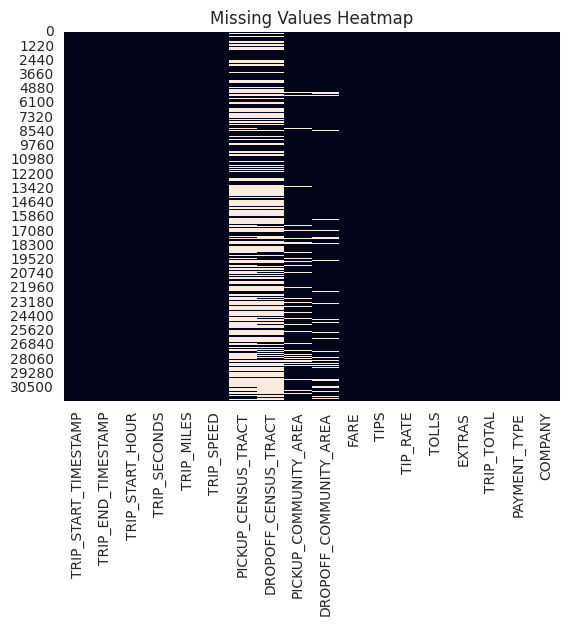

In [8]:
# Visualize missing values pattern
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
# Summary statistics for numerical columns
df.describe()


,TRIP_START_HOUR,TRIP_SECONDS,TRIP_MILES,TRIP_SPEED,PICKUP_CENSUS_TRACT,DROPOFF_CENSUS_TRACT,PICKUP_COMMUNITY_AREA,DROPOFF_COMMUNITY_AREA,FARE,TIPS,TIP_RATE,TOLLS,EXTRAS,TRIP_TOTAL
count,31694.000000,31694.000000,31694.000000,31694.000000,1.325900e+04,1.402300e+04,28477.000000,28199.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000,31694.000000
mean,14.185635,1319.796397,8.289463,20.256544,1.703153e+10,1.703140e+10,35.562138,25.550410,23.905210,3.246130,12.965785,0.002744,2.410468,29.755053
std,5.159454,928.932873,7.265672,11.110390,3.827747e+05,3.408106e+05,26.421367,20.349707,16.970022,4.284567,15.517765,0.164343,5.805087,23.145537
min,0.000000,60.000000,0.500000,4.000000,1.703102e+10,1.703101e+10,1.000000,1.000000,3.250000,0.000000,0.000000,0.000000,0.000000,3.250000
25%,10.500000,548.000000,1.720000,11.000000,1.703108e+10,1.703108e+10,8.000000,8.000000,9.000000,0.000000,0.000000,0.000000,0.000000,10.750000
50%,14.750000,1081.000000,5.920000,17.600000,1.703132e+10,1.703132e+10,32.000000,28.000000,18.750000,2.000000,12.200000,0.000000,0.000000,21.700000
75%,18.000000,1888.000000,14.500000,27.500000,1.703198e+10,1.703184e+10,59.000000,32.000000,38.750000,5.000000,20.800000,0.000000,4.000000,48.265000
max,23.750000,7140.000000,68.120000,64.800000,1.703198e+10,1.703198e+10,77.000000,77.000000,159.250000,60.000000,648.600000,27.000000,85.000000,248.500000


In [10]:
# Summary for categorical columns
df.describe(include="object")


,TRIP_START_TIMESTAMP,TRIP_END_TIMESTAMP,PAYMENT_TYPE,COMPANY
count,31694,31694,31694,31694
unique,193,195,7,31
top,05/17/2022 5:00:00 PM,05/17/2022 6:00:00 PM,Credit Card,Flash Cab
freq,331,343,14142,7887


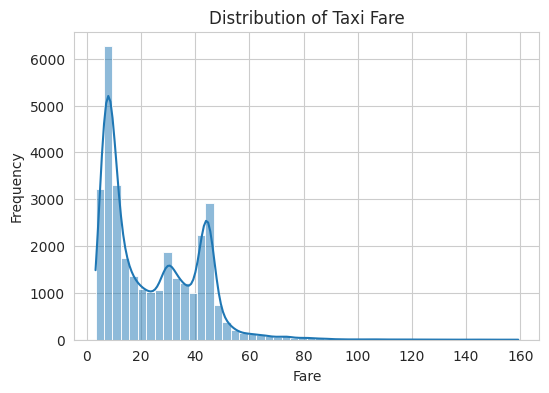

In [11]:
# Distribution of taxi fares
plt.figure(figsize=(6,4))
sns.histplot(df["FARE"], bins=50, kde=True)
plt.title("Distribution of Taxi Fare")
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.show()


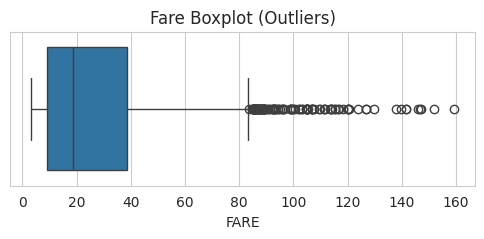

In [12]:
# Boxplot to identify fare outliers
plt.figure(figsize=(6,2))
sns.boxplot(x=df["FARE"])
plt.title("Fare Boxplot (Outliers)")
plt.show()


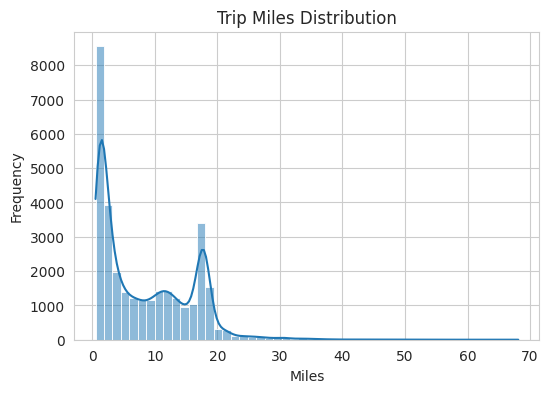

In [13]:
# Distribution of trip distance
plt.figure(figsize=(6,4))
sns.histplot(df["TRIP_MILES"], bins=50, kde=True)
plt.title("Trip Miles Distribution")
plt.xlabel("Miles")
plt.ylabel("Frequency")
plt.show()


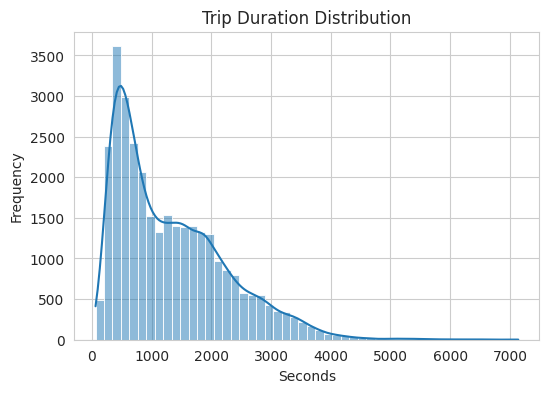

In [14]:
# Distribution of trip duration
plt.figure(figsize=(6,4))
sns.histplot(df["TRIP_SECONDS"], bins=50, kde=True)
plt.title("Trip Duration Distribution")
plt.xlabel("Seconds")
plt.ylabel("Frequency")
plt.show()


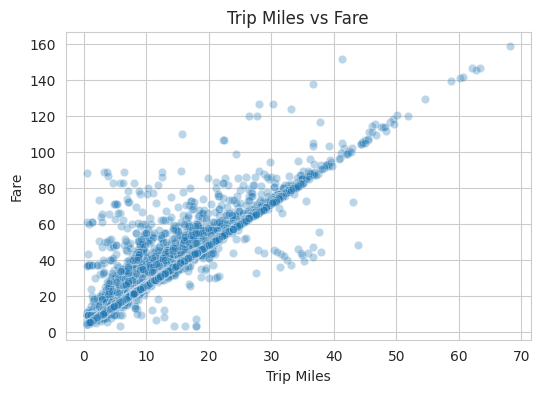

In [15]:
# Scatter plot: distance vs fare
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["TRIP_MILES"],
    y=df["FARE"],
    alpha=0.3
)
plt.title("Trip Miles vs Fare")
plt.xlabel("Trip Miles")
plt.ylabel("Fare")
plt.show()


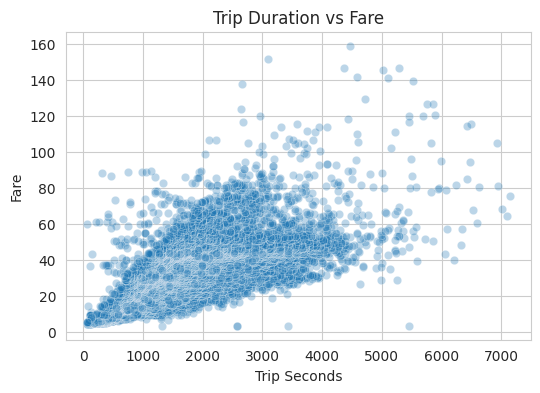

In [16]:
# Scatter plot: duration vs fare
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["TRIP_SECONDS"],
    y=df["FARE"],
    alpha=0.3
)
plt.title("Trip Duration vs Fare")
plt.xlabel("Trip Seconds")
plt.ylabel("Fare")
plt.show()


In [21]:
# Compute correlation matrix
corr = df[["TRIP_MILES", "TRIP_SECONDS", "FARE"]].corr()


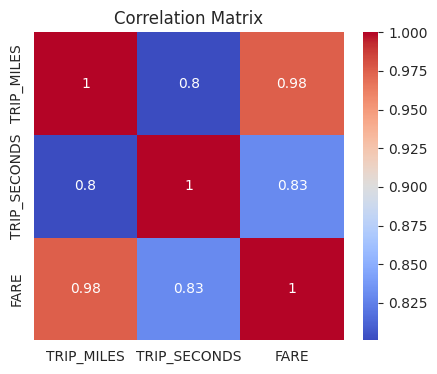

In [18]:
# Visualize correlation matrix
plt.figure(figsize=(5,4))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Matrix")
plt.show()


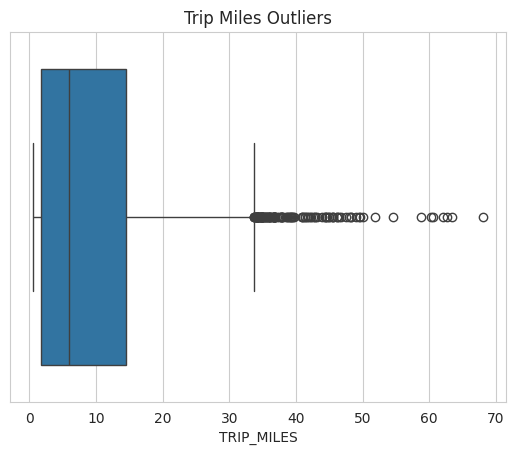

In [22]:
# Outlier visualization for trip miles
sns.boxplot(x=df["TRIP_MILES"])
plt.title("Trip Miles Outliers")
plt.show()
